In [93]:
# Laurent LEQUIEVRE
# Research Engineer, CNRS (France)
# Institut Pascal UMR6602
# laurent.lequievre@uca.fr

A REMINDER : CLASS torch.nn.Linear(in_features, out_features, bias=True)

Applies a linear transformation to the incoming data: y = x*W^T + b

Parameters:

in_features -> size of each input sample (i.e. size of x)

out_features -> size of each output sample (i.e. size of y)

bias -> If set to False, the layer will not learn an additive bias. Default: True
    
Note that the weights W have shape (out_features, in_features) and biases b have shape (out_features). 
They are initialized randomly and can be changed later 
(e.g. during the training of a Neural Network they are updated by some optimization algorithm).

In [94]:
import torch
import torch.nn as nn

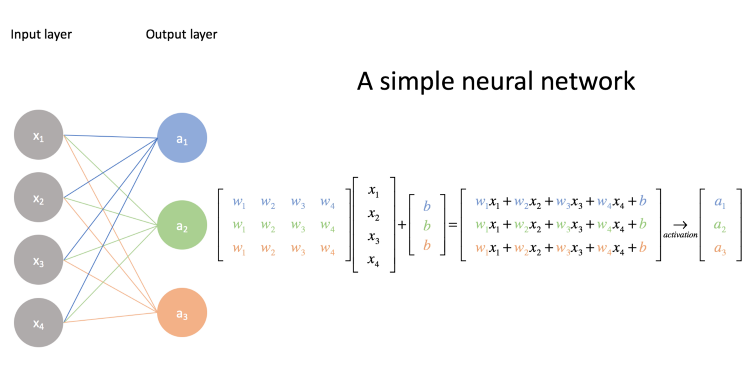

In [95]:
# Concrete example of nn.Linear
# Create a tensor x of size 3 x 2
# Where x contains three inputs (i.e. the batch size is 3), x[0], x[1] and x[3], each of size 2
x = torch.tensor([[1.0, -1.0],
                  [0.0,  1.0],
                  [0.0,  0.0]])

in_features = x.shape[1]  # = 2
out_features = 5

m = nn.Linear(in_features, out_features)

y = m(x)

# create a fully connected linear layer, which takes input x of shape (batch_size, in_features), 
# where batch size is the number of inputs (each of size in_features) 
# which are passed to the network at once (as a single tensor), 
# and transforms it by the linear equation y = x*W^T + b into a tensor y of shape (batch_size, out_features).

# Internal parameters :
# -> Weights W have shape (out_features, in_features) -> W(5,2)
# -> Biases b have shape (out_features) -> b(5)

# Output :
# y is going to be of shape (batch size, out_features) -> y(3, 5).

# and (behind the scenes) it is computed as:
# y = x.matmul(m.weight.t()) + m.bias  # y = x*W^T + b
# ==> y(3,5) = x(3,2) * W^T(2,5) + b(5)

In [96]:
# m.weight and m.bias were initialized randomly.
print(m.weight.size())
print(m.weight)

torch.Size([5, 2])
Parameter containing:
tensor([[-0.3371, -0.5125],
        [-0.1759, -0.0458],
        [ 0.4663,  0.0403],
        [-0.2660,  0.5995],
        [-0.7041,  0.6626]], requires_grad=True)


In [97]:
print(m.bias.size())
print(m.bias)

torch.Size([5])
Parameter containing:
tensor([ 0.0296, -0.3175, -0.6708, -0.3396, -0.2262], requires_grad=True)


In [98]:
# The output y is :
print(y.size())
print(y)

torch.Size([3, 5])
tensor([[ 0.2050, -0.4476, -0.2448, -1.2052, -1.5929],
        [-0.4828, -0.3633, -0.6306,  0.2599,  0.4364],
        [ 0.0296, -0.3175, -0.6708, -0.3396, -0.2262]],
       grad_fn=<AddmmBackward>)


In [99]:
import torch
import torch.nn as nn  # define a shortcut 'nn' to avoid always use 'torch.nn'
import torch.nn.functional as F # define a shortcut 'F' to avoid always use 'torch.nn.functional' 

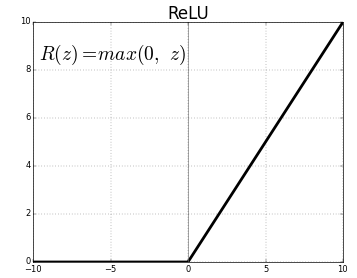

In [100]:
# Example 1 :
# =========
# A simple network : 2 Inputs, 3 outputs and 1 relu activation Function
# Defined step by step with a Linear Module

x = torch.tensor([1.0, -1.0]) # define a tensor torch.Size([2])

net = nn.Linear(2, 3) # define a Linear network with in_features=2, out_features=3, bias=True (by default)

print("input : {}".format(x))
print("--------------------------------")

print("Weight : {}".format(net.weight))
print("Bias : {}".format(net.bias))
print("--------------------------------")

output = net.forward(x) # forward tensor into the net and get the output
y = x.matmul(net.weight.t()) + net.bias # just to verify the equation : y = x*W^T + b

print("output : {}".format(output))
print("y : {}".format(y))
print("--------------------------------")

activation = F.relu(output) # compute activation of output

print("activation : {}".format(activation))

input : tensor([ 1., -1.])
--------------------------------
Weight : Parameter containing:
tensor([[-0.1979, -0.3179],
        [ 0.5005, -0.2140],
        [-0.0233,  0.5291]], requires_grad=True)
Bias : Parameter containing:
tensor([ 0.2665, -0.6143,  0.2211], requires_grad=True)
--------------------------------
output : tensor([ 0.3866,  0.1001, -0.3313], grad_fn=<AddBackward0>)
y : tensor([ 0.3866,  0.1001, -0.3313], grad_fn=<AddBackward0>)
--------------------------------
activation : tensor([0.3866, 0.1001, 0.0000], grad_fn=<ReluBackward0>)


In [101]:
# Example 2 :
# =========
# The same network defined with a Sequential container
# A sequential container. Modules will be added to it in the order they are passed in the constructor.

# nn.ReLU() creates an nn.Module which you can be added to an nn.Sequential model.
# nn.functional.relu is just the functional API call to the relu function.

x = torch.tensor([1.0, -1.0]) # define a tensor torch.Size([2])

net = nn.Sequential(
                    nn.Linear(2, 3),
                    nn.ReLU()
                    );

print("input : {}".format(x))
print("--------------------------------")

print("network structure : {}".format(net))

print("--------------------------------")
print("Weight : {}".format(net[0].weight))  # net parameters contained at index 0
print("Bias : {}".format(net[0].bias)) # net parameters contained at index 0
print("Activation function : {}".format(net[1]))
print("--------------------------------")

activation = net.forward(x) # forward tensor into the net and get the output
print("activation : {}".format(activation))

print("--------------------------------")
output = torch.matmul(x,net[0].weight.t()) + net[0].bias;  # Just to verify
print("internal output : {}".format(output))
print("ReLU(output) :{}".format(torch.nn.ReLU().forward(output))) # Just to verify


input : tensor([ 1., -1.])
--------------------------------
network structure : Sequential(
  (0): Linear(in_features=2, out_features=3, bias=True)
  (1): ReLU()
)
--------------------------------
Weight : Parameter containing:
tensor([[ 0.7018,  0.4667],
        [-0.6926, -0.3367],
        [ 0.0021, -0.5213]], requires_grad=True)
Bias : Parameter containing:
tensor([ 0.3705, -0.2461, -0.1301], requires_grad=True)
Activation function : ReLU()
--------------------------------
activation : tensor([0.6055, 0.0000, 0.3932], grad_fn=<ReluBackward0>)
--------------------------------
internal output : tensor([ 0.6055, -0.6021,  0.3932], grad_fn=<AddBackward0>)
ReLU(output) :tensor([0.6055, 0.0000, 0.3932], grad_fn=<ReluBackward0>)


In [102]:
# Example 2 :
# =========
# The same network defined as a custom Module subclass without Sequantial container

class NeuralNetwork(nn.Module):
    def __init__(self, n_inputs, n_outputs):
        super().__init__()  # Call parent nn.Module constructor
        self.l1 = nn.Linear(n_inputs, n_outputs)
        self.act1 = nn.ReLU()

    def forward(self, x):
        x = self.l1(x)
        x = self.act1(x)
        return x


    
model = NeuralNetwork(2, 3)
x = torch.tensor([1.0, -1.0]) # define a tensor torch.Size([2])
activation = model.forward(x)

print("input : {}".format(x))
print("--------------------------------")
print("Weight : {}".format(model.l1.weight)) 
print("Bias : {}".format(model.l1.bias))
print("Activation function : {}".format(model.act1))
print("--------------------------------")
print("activation : {}".format(activation))
print("--------------------------------")
output = torch.matmul(x,model.l1.weight.t()) + model.l1.bias;  # Just to verify
print("internal output : {}".format(output))
print("ReLU(output) :{}".format(torch.nn.ReLU().forward(output))) # Just to verify


input : tensor([ 1., -1.])
--------------------------------
Weight : Parameter containing:
tensor([[ 0.3506, -0.4104],
        [-0.4469,  0.6051],
        [ 0.2095, -0.6587]], requires_grad=True)
Bias : Parameter containing:
tensor([0.0132, 0.3761, 0.0280], requires_grad=True)
Activation function : ReLU()
--------------------------------
activation : tensor([0.7742, 0.0000, 0.8962], grad_fn=<ReluBackward0>)
--------------------------------
internal output : tensor([ 0.7742, -0.6759,  0.8962], grad_fn=<AddBackward0>)
ReLU(output) :tensor([0.7742, 0.0000, 0.8962], grad_fn=<ReluBackward0>)


In [105]:
# Example 3 :
# =========
# The same network defined as a custom Module subclass with Sequantial container

class NeuralNetworkSequential(nn.Module):
    def __init__(self, n_inputs, n_outputs):
        super().__init__()  # Call parent nn.Module constructor
        self.net = nn.Sequential(
                    nn.Linear(n_inputs, n_outputs),
                    nn.ReLU()
                    );

    def forward(self, x):
        x = self.net(x)
        return x


    
model = NeuralNetworkSequential(2, 3)

print("--------------------------------")
print("network structure : {}".format(net))
print("--------------------------------")

x = torch.tensor([1.0, -1.0]) # define a tensor torch.Size([2])
activation = model.forward(x)

print("input : {}".format(x))
print("--------------------------------")
print("Weight : {}".format(model.net[0].weight)) 
print("Bias : {}".format(model.net[0].bias))
print("Activation function : {}".format(model.net[1]))
print("--------------------------------")
print("activation : {}".format(activation))
print("--------------------------------")
output = torch.matmul(x,model.net[0].weight.t()) + model.net[0].bias;  # Just to verify
print("internal output : {}".format(output))
print("ReLU(output) :{}".format(torch.nn.ReLU().forward(output))) # Just to verify


--------------------------------
network structure : Sequential(
  (0): Linear(in_features=2, out_features=3, bias=True)
  (1): ReLU()
)
input : tensor([ 1., -1.])
--------------------------------
Weight : Parameter containing:
tensor([[-0.6792, -0.6994],
        [-0.0940, -0.1266],
        [-0.2730,  0.4295]], requires_grad=True)
Bias : Parameter containing:
tensor([-0.3921, -0.3205, -0.3736], requires_grad=True)
Activation function : ReLU()
--------------------------------
activation : tensor([0., 0., 0.], grad_fn=<ReluBackward0>)
--------------------------------
internal output : tensor([-0.3719, -0.2879, -1.0761], grad_fn=<AddBackward0>)
ReLU(output) :tensor([0., 0., 0.], grad_fn=<ReluBackward0>)
